In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Data and converting to DataFrame
df=pd.read_csv('titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
pclass_count=pd.DataFrame(df['Pclass'].value_counts())

In [21]:
pclass_count

,Pclass
3,491
1,216
2,184


In [23]:
sex_count=pd.DataFrame(df['Sex'].value_counts())
sex_count

,Sex
male,577
female,314


In [24]:
survived_count=pd.DataFrame(df['Survived'].value_counts())
survived_count

,Survived
0,549
1,342


In [28]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [25]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### From the dataset and performing various above operations we can see the following details:
1) There are 5 int64, 5 Object and 2 float columns
2) Age, Cabin and Exbarked columns has null values. Cabin has around 77% NaN values and can be dropped. Age can we treated.
3) Passenger ID and Name can be dropped since they have no contribution
4) Sex and Embarked columns will have to be encoded

In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
#DROPPING PassengerID, Name and Cabin columns
newdf=df.drop(['PassengerId','Name','Cabin'],axis=1)

In [65]:
newdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [66]:
# Converting Sex column to binary numbers using replace
newdf['Sex'] = newdf['Sex'].replace({'male': 0, 'female': 1})

In [67]:
newdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,A/5 21171,7.2500,S
1,1,1,1,38.0,1,0,PC 17599,71.2833,C
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,1,35.0,1,0,113803,53.1000,S
4,0,3,0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,211536,13.0000,S
887,1,1,1,19.0,0,0,112053,30.0000,S
888,0,3,1,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,0,26.0,0,0,111369,30.0000,C


In [68]:
# Dropping Ticket column as it has 681 unique values and can mislead the model
newdf=newdf.drop('Ticket',axis=1)

In [69]:
newdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [70]:
newdf.isnull().sum() # age and embarked columns has null values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [89]:
newdf=newdf.dropna()

In [90]:
newdf # 179 rows were dropped

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,Q
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
889,1,1,0,26.0,0,0,30.0000,C


In [116]:
# Converting Embarked column into integars
newdf['Embarked']=newdf['Embarked'].replace({'S':1,'C':2,'Q':3})

In [117]:
newdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,3
886,0,2,0,27.0,0,0,13.0000,1
887,1,1,1,19.0,0,0,30.0000,1
889,1,1,0,26.0,0,0,30.0000,2


In [118]:
newdf.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [119]:
corr=newdf.corr()

In [120]:
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100,0.108517
Pclass,-0.356462,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893,-0.108502
Sex,0.536762,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457,0.097129
Age,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,0.012186
SibSp,-0.015523,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860,0.004021
Parch,0.095265,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624,-0.014082
Fare,0.266100,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,0.176859
Embarked,0.108517,-0.108502,0.097129,0.012186,0.004021,-0.014082,0.176859,1.000000


<Axes: >

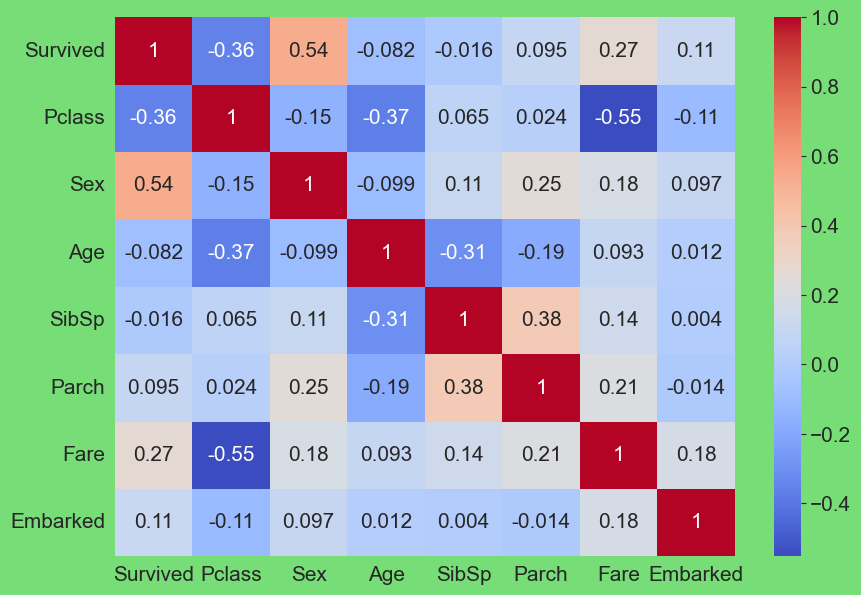

In [121]:
sns.set_palette("pastel")
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#77DD77'
sns.heatmap(corr,annot=True,cmap='coolwarm')

#### From the heatmap we can derive the following:
1) Sex has a moderate positive correlation with survival. Suggesting that female(ie class 1) are given preference thereby increasing survival rate
2) Fare has a weak positive correlation with survival. Suggesting that with higher fare the survival rate increases
3) Age has weak negative correlation with survival. Suggesting passengers with higher age have low survival rate.
4) Pclass has strong negative correlation suggesting that as the Pclass decreases(Premiumness increases), survival mincreases.

In [122]:
# Seperating x data
x=newdf.drop('Survived',axis=1)

In [123]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250,3
886,2,0,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,1
889,1,0,26.0,0,0,30.0000,2


In [124]:
# Seperating y target label
y=newdf['Survived']

In [125]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [285]:
# splitting x data in train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=48)

In [286]:
print(len(x_train),len(y_train),len(x_test),len(y_test))

569 569 143 143


In [287]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [144]:
#Creating models and parameters in a dictionary for Hyperparameter tuning
model={'LogisticRegression':LogisticRegression(),
       'DecisionTreeClassifier':DecisionTreeClassifier(),
       'RandomForestClassifier':RandomForestClassifier(),
       'Gradient Boosting':GradientBoostingClassifier()}

params={'LogisticRegression':{
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
},
       'DecisionTreeClassifier':{
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5, 10]
       },
       'RandomForestClassifier':{
        'n_estimators': [100, 200, 300],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5, 10],
        'bootstrap': [True, False]
       },
       'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'subsample': [0.7, 0.8],
        'max_features': ['sqrt']}}

In [145]:
# Performing gridsearchCV to get best performing model and their best parameters
best_models = {}
for mod in model:
    grid_search = GridSearchCV(model[mod], params[mod], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_models[mod] = grid_search.best_estimator_
    print(f"Best parameters for {mod}: {grid_search.best_params_}")

for model_name in best_models:
    model = best_models[model_name]
    y_pred = model.predict(x_test)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

/Users/divyasandiman/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/divyasandiman/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Best parameters for LogisticRegression: {'C': 10, 'solver': 'lbfgs'}
Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best parameters for RandomForestClassifier: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143

Accuracy: 0.7972027972027972

DecisionTreeClassifier Classificatio

In [288]:
#Creating instance of model based on findings from gridsearchCV
lr=LogisticRegression(C=10,solver='lbfgs')

In [289]:
#Training data
lr.fit(x_train,y_train)

LogisticRegression(C=10)

In [290]:
# Predicting survival class using xtest
pred=lr.predict(x_test)

In [291]:
# Checking accuracy
accuracy_score(y_test,pred)

0.8461538461538461

In [292]:
print('Confusion Matrix:')
confusion_matrix(y_test,pred)

Confusion Matrix:


array([[76,  9],
       [13, 45]])

In [293]:
print('Classification Report:')
print(classification_report(y_test,pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        85
           1       0.83      0.78      0.80        58

    accuracy                           0.85       143
   macro avg       0.84      0.83      0.84       143
weighted avg       0.85      0.85      0.85       143



##### Both Class 1 and 0 were predicted fairly well. Suggesting a good model performance

In [294]:
# Creating data row to check prediction
data=[[3,0,32.0,0,0,7.7500,3]]

lr.predict(data)

array([0])

In [166]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250,3
886,2,0,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,1
889,1,0,26.0,0,0,30.0000,2


In [168]:
# Standardizing data to improve accuracy score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [307]:
# Splitting data using scaled x
xscaled_train,xscaled_test,ynew_train,ynew_test=train_test_split(x_scaled,y,test_size=0.20,random_state=35)

In [308]:
# passing scaled training data to model
lr.fit(xscaled_train,ynew_train)

LogisticRegression(C=10)

In [309]:
# Predicting using scaled data
predtest=lr.predict(xscaled_test)

In [310]:
accuracy_score(ynew_test,predtest)

0.8461538461538461

In [316]:
print('Classification Report:')
print(classification_report(ynew_test,predtest))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.87        91
           1       0.76      0.85      0.80        52

    accuracy                           0.85       143
   macro avg       0.83      0.85      0.84       143
weighted avg       0.85      0.85      0.85       143



In [317]:
print('Y test scores :',ynew_test.values[:5])
print('Predicted values :',predtest[:5])

Y test scores : [0 0 1 0 0]
Predicted values : [0 0 1 0 0]


#### We can see that the first 5 rows for y test data with predicted results are matching. Hence we can say that the prediction are correct.

### Standardization of x has not resulted in any change in accuracy score. However in changing the random_state of train_test_split to 48/38 and 35 has increased the accuracy and f1 scores significantly.